# Linear Regression Model

In [1]:
import pandas as pd
df =pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
df = df.iloc[:,1:]
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [7]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


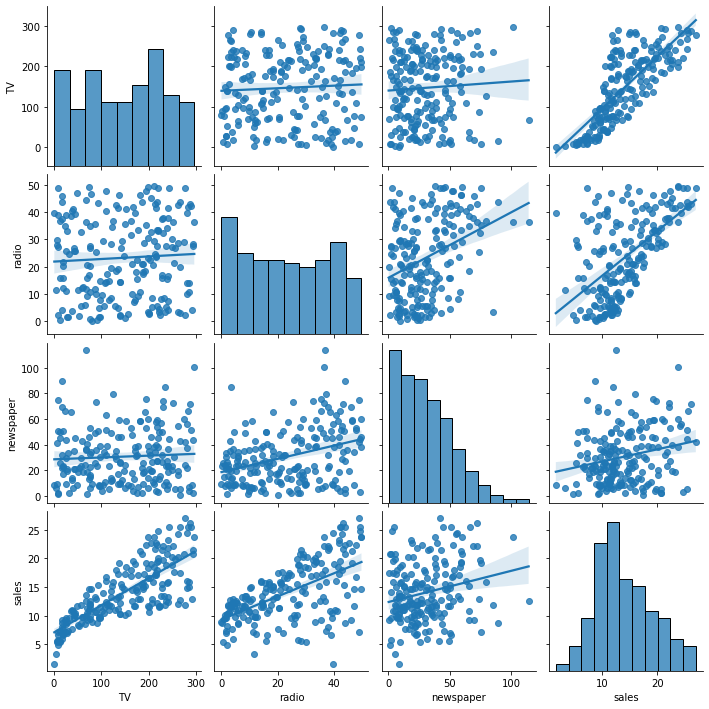

In [12]:
import seaborn as sns
sns.pairplot(df, kind = 'reg');

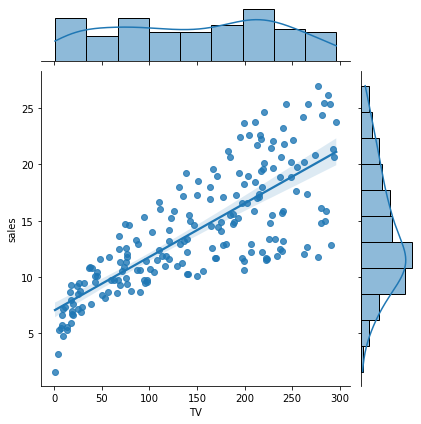

In [15]:
sns.jointplot(x='TV', y= 'sales', data=df, kind = 'reg');

#burda degiskenleri tanimak istiyoruz 

### Statsmodels ile modelleme ve ciktilari yorumlama

In [16]:
import statsmodels.api as sm

In [20]:
X = df[['TV']]
X[0:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [21]:
X = sm.add_constant(X)  #matris isleminin yapilmasi icin ekledik,cünkü kendisi sadece 1 sütundu 
X[0:5]

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8


In [22]:
y= df['sales']
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [28]:
lm = sm.OLS(y,X)   #model kurduk,sklearn'de istatiki aciklamalar verilmedigi icin böyle yaptik
model = lm.fit()
model.summary()

#bu tüm degiskenleri gösterecek yazim sekli

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        13:18:48   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model = lm.fit()
model

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        11:43:08   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#cons-coef kesisiminde,yani ortalma satistir,diger degiskenlerin etki etmedigi zamanki
#TV-coef TV verilen 1 birimlik artista satilar bu kadar artiyor

In [30]:
import statsmodels.formula.api as smf 
lm = smf.ols('sales ~ TV', df)
model = lm.fit()
model.summary()

#burdada istedigin degiskenleri secerek bu tabloyu aliyorsun

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 08 Sep 2022   Prob (F-statistic):           1.47e-42
Time:                        13:20:52   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
model.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [55]:
print('Sales= '+ str( '%2f' %model.params[0])+' + ' + 'TV*'+ str( '%2f' %model.params[1]))

#simdi bunun denklemini yazayim

Sales= 7.032594 + TV*0.047537


In [32]:
model.summary().tables[1]
#bu yukarida ki tablo 3 kisimdan olusuyor,eger orta kismi görmek icin[1] yazdik

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [33]:
model.conf_int()

#sadece modelin güven araliklarini görmek istersen

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


In [38]:
print(model.f_pvalue)

print('f_pvalue: ','%.4f' %model.f_pvalue)   #buda e den kurtulmak icin

#e-42 10 üzeri eksi 42 demek

1.467389700194647e-42
f_pvalue:  0.0000


In [39]:
print('fvalue: ','%.2f' %model.fvalue)    

fvalue:  312.14


In [42]:
print('tvalue: ','%.2f' %model.tvalues[0:1])    #fvalue ,modelin anlamliligi 

tvalue:  15.36


In [43]:
 model.mse_model  #bu sayi bunun icin cok korkunc dedi

3314.618166868649

In [44]:
model.rsquared   #Rkare degeri

0.611875050850071

In [45]:
model.rsquared_adj   #Adjusted R squared 

0.6099148238341623

In [46]:
model.fittedvalues[0:5] #modelin tahmin ettgi degerler ,sklearn'de predict ile yapiyorduk ama burda farkli

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [47]:
y[0:5]   #gercek y degerleri

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [72]:
print('Satis = ' + str('%.2f' %model.params[0])+ ' + ' + 'TV*'+ str('%.2f'% model.params[1]))

Satis = 7.03 + TV*0.05


/Users/veyselaytekin/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Satis Sayisi')

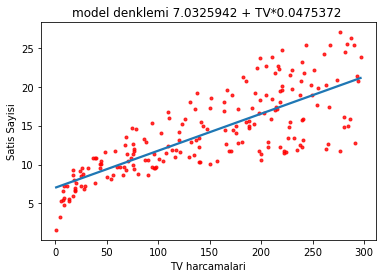

In [70]:
g= sns.regplot(df['TV'],df['sales'], ci=None, scatter_kws= {'color':'r','s':9})
g.set_title('model denklemi 7.0325942 + TV*0.0475372 ')
g.set_xlabel('TV harcamalari')
g.set_ylabel('Satis Sayisi')

#### bunlari birde Sklearn ile yapialim

In [76]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
model = reg.fit(X,y)
model


#summary diye bir özelligi yok

LinearRegression()

In [77]:
model.intercept_   #bunlarla yukaridaki denklemi alabiliyoruz

7.032593549127696

In [78]:
model.coef_

array([0.        , 0.04753664])